In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Визначаємо функцію зчитування та візуалізації зображення

In [13]:
def imshow(title = 'Image', image=None, size = 20):
    w, h = image.shape[0], image.shape[1]
    aspect_ration = w/h 
    plt.figure(figsize=(size*aspect_ration, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show


Визначаємо функції збереження зображення на диск

In [14]:
def save_image(image, output_path):
    
    cv2.imwrite(output_path, image)
    print(f"Зображення збережено у файл {image}.jpg")

Визначаємо зображення як зміну для подальшиї дій

In [15]:
img = cv2.imread('photo_2023-11-01_19-34-44.jpg')

Візуалізуємо

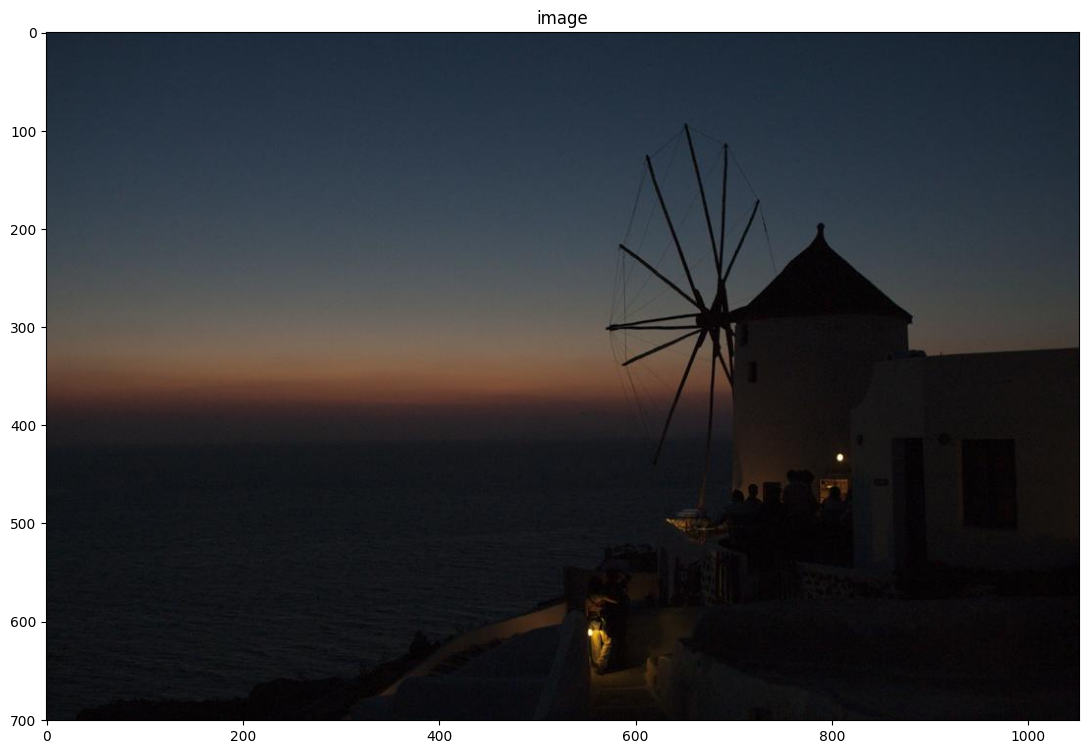

In [16]:
imshow('image',img)

### Функція зміни контрасності та яскравості

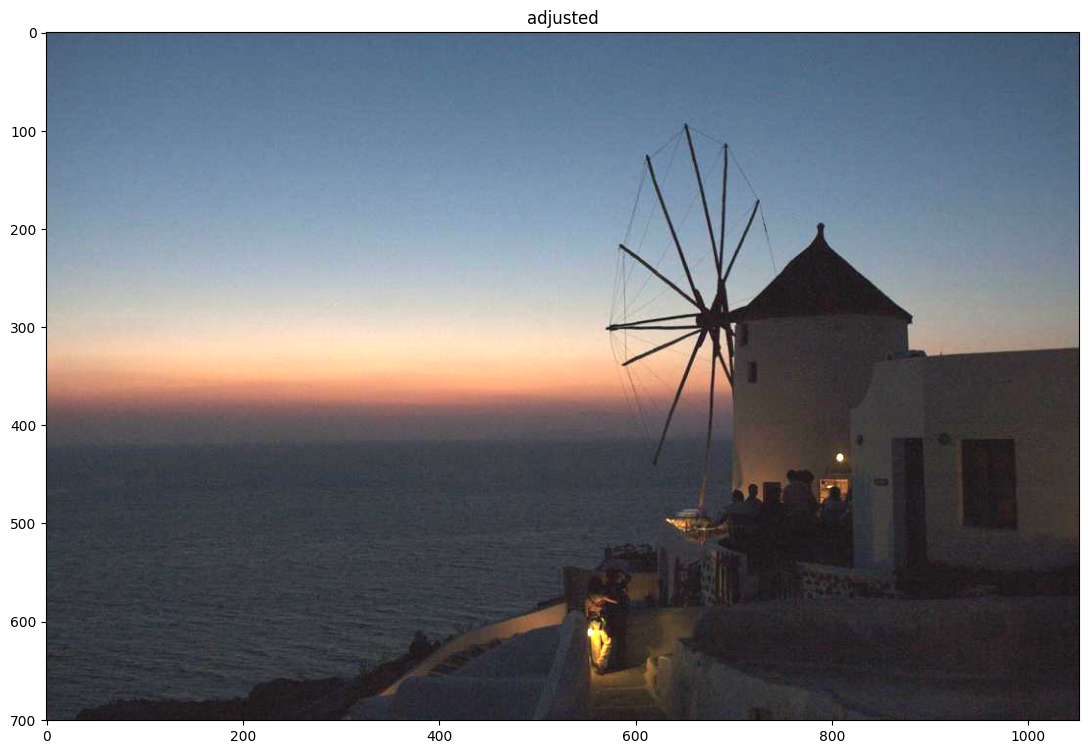

In [17]:
def adjusted(img,alpha_i=float, beta_i=int):
    # Contrast control (1.0-3.0)
    # Brightness control (0-100)
    adjusted = cv2.convertScaleAbs(img, alpha=alpha_i, beta=beta_i)
    imshow('adjusted',adjusted) 
    
adjusted(img,2,20)

### Функція зміни насиченності

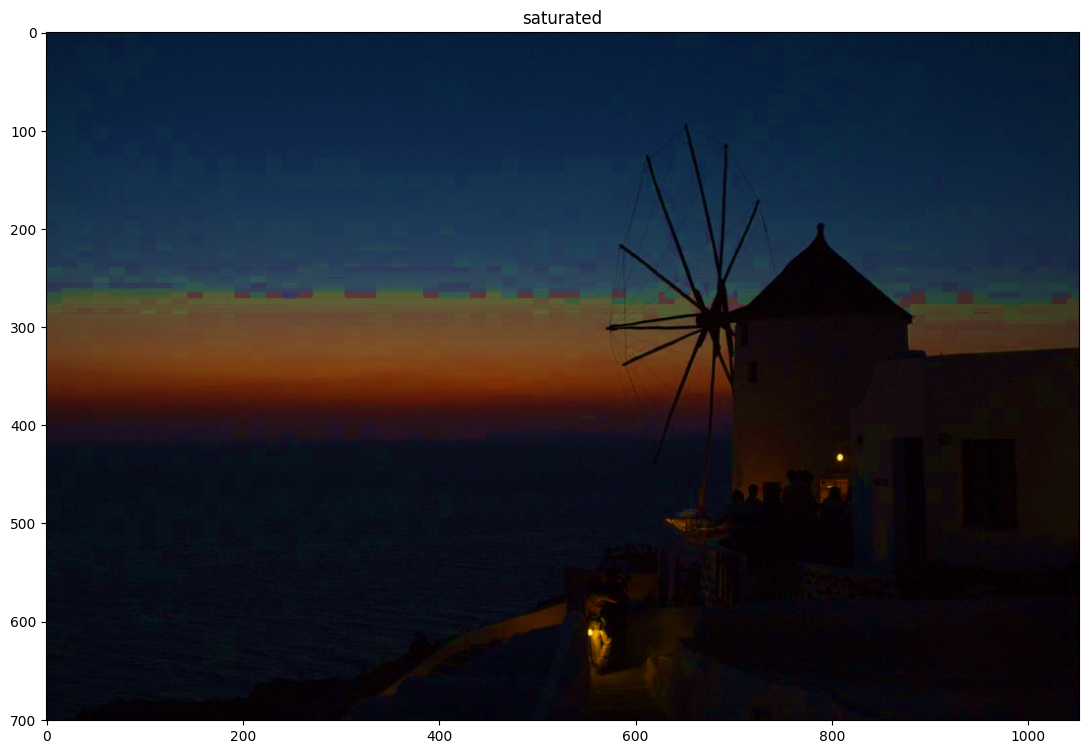

In [18]:
def saturated (img,level_saturated=int):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s = cv2.add(s, level_saturated)
    saturated = cv2.merge((h, s, v))
    saturated = cv2.cvtColor(saturated, cv2.COLOR_HSV2BGR)
    imshow('saturated',saturated)
    
saturated(img, 101)

### Функція зміни розміру зображення

На функцію передаємо саме зображення, та нову ширину та висоту . Опціонально можно передавати поокремо висоту або ширину, в наслідок чого функція обчислює відношення старих розмірів до нових, щоб зображення було пропорційно змінено і в залежності від збільшення чи зменшення використовує методи інтерполяції AREA та LINEAR відповідно.
Є можливість передавати 2 нових значення, тоді зображення зміниться відносно нових змінних.

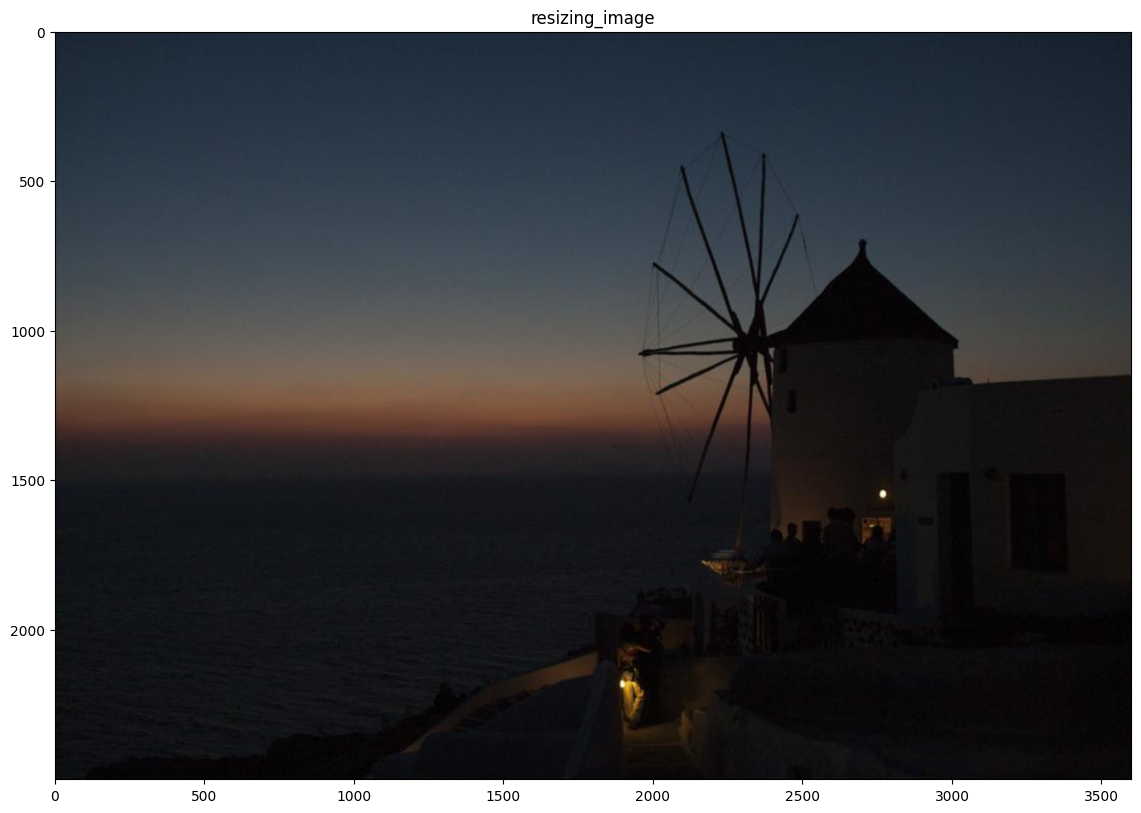

In [19]:
def resizing( img, new_width=None, new_height=None):
    
    h, w = img.shape[:2]

    if new_width is None and new_height is None:
        return img

    if new_width is None:
        ratio = new_height / h
        dimension = (int(w * ratio), new_height)
    elif new_height is None:
        ratio = new_width / w
        dimension = (new_width, int(h * ratio))
    else:
        dimension = (new_width, new_height)

    if dimension[0] < w or dimension[1] < h:
        interp = cv2.INTER_AREA
    else:
        interp = cv2.INTER_LINEAR

    resizing_image = cv2.resize(img, dimension, interp)

    return imshow('resizing_image',resizing_image)
        
resizing(img,new_height=2500,new_width=3600)

### Функція обрізання  зображення по заданих розмірах

На функції передаємо зображення та 2 кортежа з координатами початкової та кінцевої точки .

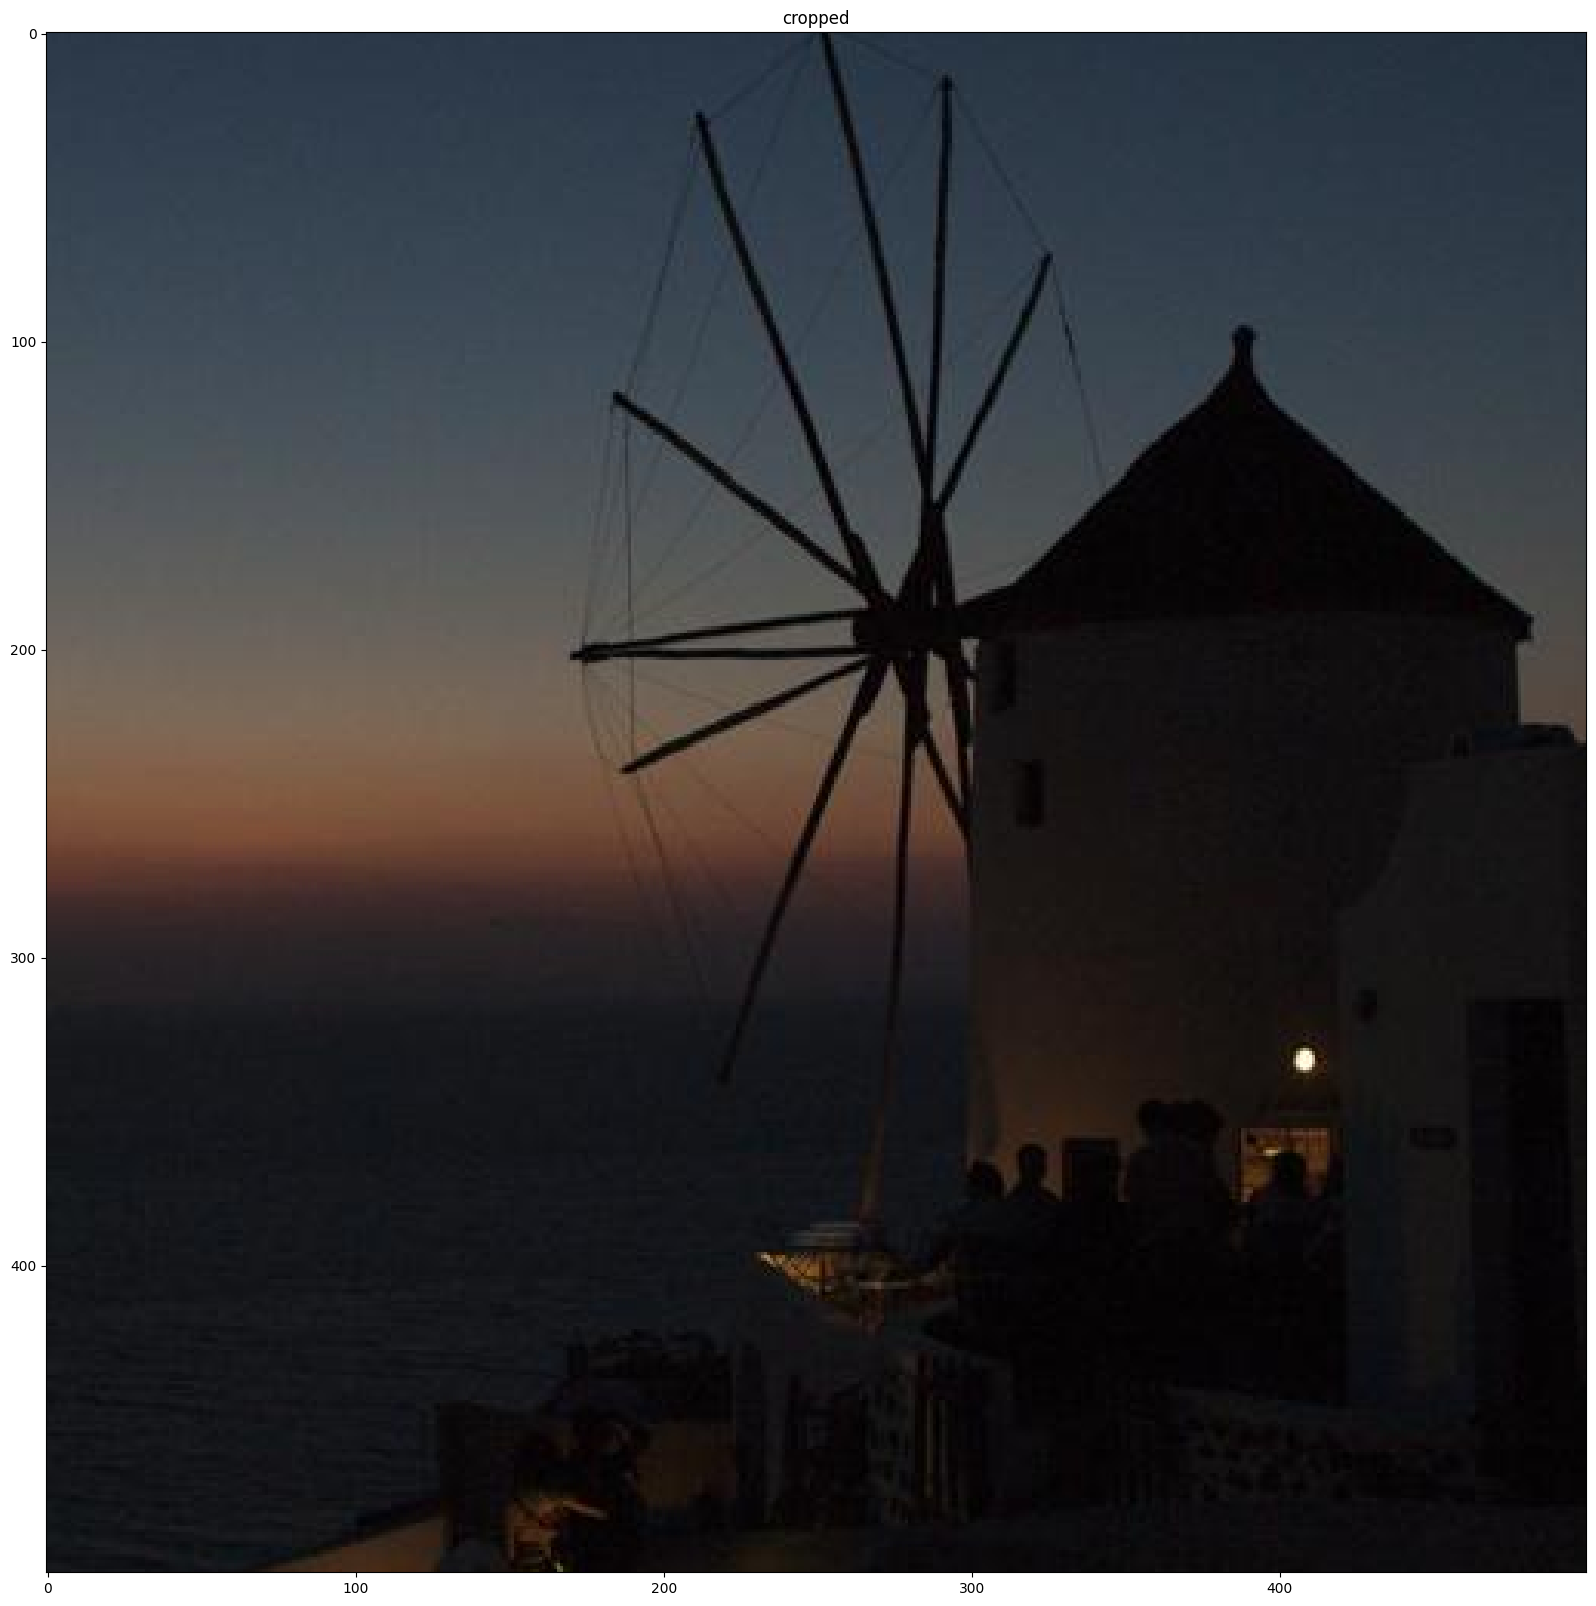

In [20]:
def crop(img, start_point=tuple, end_point=tuple):
    x1, y1 = start_point
    x2, y2 = end_point

    # Crop the image
    cropped = img[y1:y2, x1:x2]
    imshow('cropped',cropped)
    
crop(img,(400,100),(900,600))

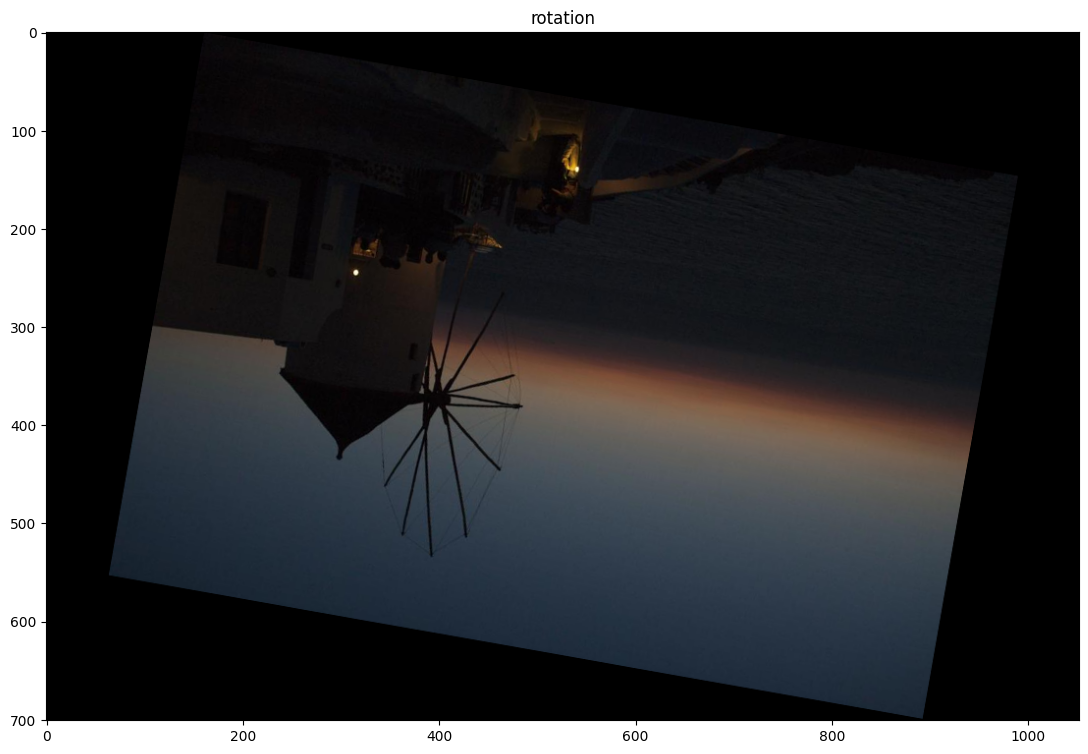

In [29]:
def rotation(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    scale = 0.8

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(img, M, (w,h))

    return rotated
    
rot = rotation(img,170)
imshow('rotation', rot)

In [27]:
save_image(rot,'rotated.jpg')

Зображення збережено у файл [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]].jpg
